---
---

# Predicting Early Stage Diabetes

---
---

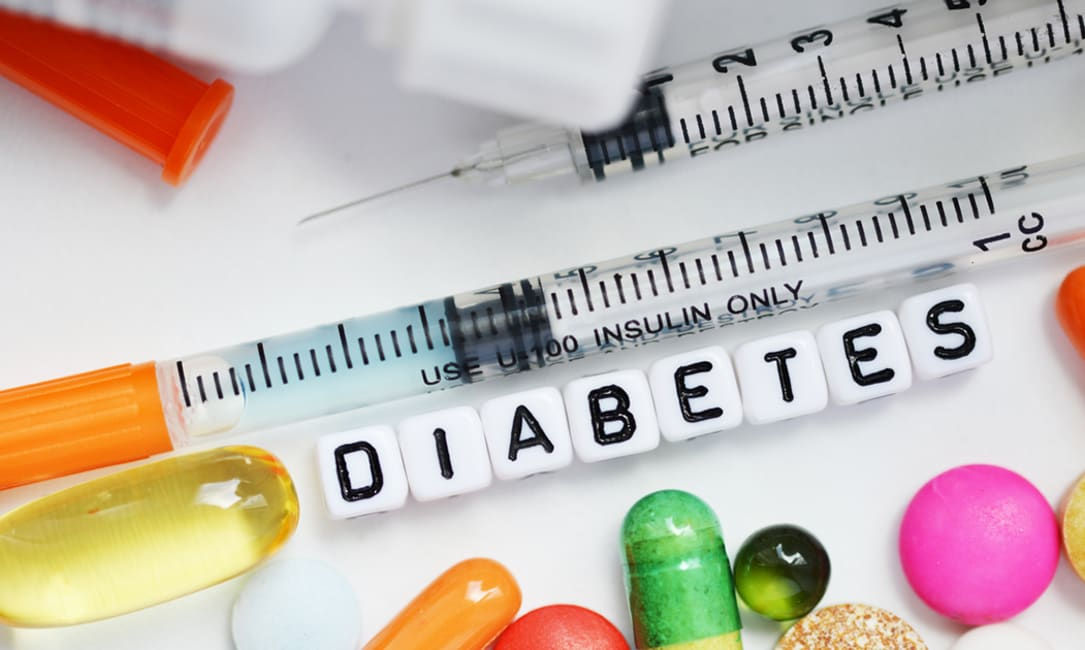

---

## Dataset

[Diabetes Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv)

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading CSV

In [2]:
data=pd.read_csv("diabetes_data.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Data Analysis

#### Get Detailed Information About Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
Age                   520 non-null int64
Gender                520 non-null object
Polyuria              520 non-null object
Polydipsia            520 non-null object
sudden weight loss    520 non-null object
weakness              520 non-null object
Polyphagia            520 non-null object
Genital thrush        520 non-null object
visual blurring       520 non-null object
Itching               520 non-null object
Irritability          520 non-null object
delayed healing       520 non-null object
partial paresis       520 non-null object
muscle stiffness      520 non-null object
Alopecia              520 non-null object
Obesity               520 non-null object
class                 520 non-null object
dtypes: int64(1), object(16)
memory usage: 69.2+ KB


#### Get Description of Data

In [4]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


#### Get Profile Report of Data

Profile reports are interactive reports in web format that can be presented to any person, even if they don’t know programming.
In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)

In [6]:
profile.to_file('profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/strings.py:1387: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
import IPython
IPython.display.HTML(filename='profile_report.html')

Number of variables,17
Number of observations,520
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,107
Duplicate rows (%),20.6%
Total size in memory,69.2 KiB
Average record size in memory,136.2 B
Numeric,1
Categorical,2
Boolean,14


Here Profile report gives all information of Data nearly still we will use some ploting to get idea completely

### Data Visualization

In [8]:
sns.heatmap(data = data.isnull(),cmap='viridis')

So we don't have null values in our data

In [9]:
sns.countplot(x ='Gender', data = data)

In [10]:
sns.boxplot(x="Age", y="class", data=data)

In [11]:
sns.catplot(x="Age", y="Obesity", data=data)

In [12]:
sns.catplot(x="Age", y="Polyuria", data=data)

In [13]:
sns.displot(data=data, x="Gender", y="class")

### Let's Encode Data by using Label Encoder

In [14]:
data=pd.DataFrame({col: data[col].astype('category').cat.codes for col in data}, index=data.index)

### Splitting Data

In [15]:
x = data.drop(['class'],axis=1)
y = data['class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=0)

### Training Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        62
           1       0.94      0.96      0.95        94

    accuracy                           0.94       156
   macro avg       0.94      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



In [18]:
importance = logistic_regression.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: -0.03023
Feature: 1, Score: -2.59738
Feature: 2, Score: 2.59724
Feature: 3, Score: 2.74650
Feature: 4, Score: 0.56563
Feature: 5, Score: 0.35748
Feature: 6, Score: 0.56827
Feature: 7, Score: 1.08241
Feature: 8, Score: 0.11975
Feature: 9, Score: -1.06760
Feature: 10, Score: 1.52880
Feature: 11, Score: -0.37833
Feature: 12, Score: 0.86594
Feature: 13, Score: -0.02542
Feature: 14, Score: -0.19597
Feature: 15, Score: 0.02994


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        62
           1       0.95      0.81      0.87        94

    accuracy                           0.86       156
   macro avg       0.86      0.87      0.86       156
weighted avg       0.88      0.86      0.86       156



In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85        62
           1       0.88      0.95      0.91        94

    accuracy                           0.89       156
   macro avg       0.90      0.88      0.88       156
weighted avg       0.89      0.89      0.89       156



In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.99      0.98      0.98        94

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



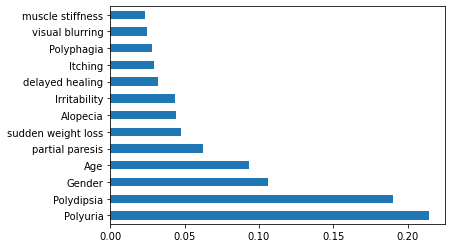

In [22]:
%matplotlib inline          
model = RandomForestClassifier()
model.fit(x, y)
(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(13)
   .plot(kind='barh'))  

In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.99      0.97      0.98        94

    accuracy                           0.97       156
   macro avg       0.97      0.98      0.97       156
weighted avg       0.97      0.97      0.97       156



[0.02768424 0.11016047 0.23613656 0.2029528  0.03938451 0.05305144
 0.02485251 0.02487623 0.02407103 0.03559836 0.06952608 0.03181154
 0.02379104 0.01650284 0.06414104 0.01545939]


<BarContainer object of 16 artists>

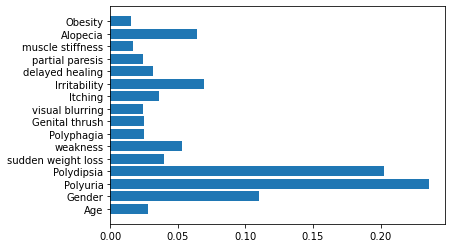

In [24]:
print(xgb.feature_importances_)
plt.barh(x.columns.values.tolist(),xgb.feature_importances_)

### So from above accuracy scores we can have conclusion Random forest performs well

Generating requirements.text

In [25]:
from pip._internal.utils.misc import get_installed_distributions
import sys
#import numpy as np # imported to test whether numpy shows up, which it does!

def get_imported_packages():
    p = get_installed_distributions()
    p = {package.key:package.version for package in p}

    imported_modules = set(sys.modules.keys())
    
    imported_modules.remove('pip')

    modules = [(m, p[m]) for m in imported_modules if p.get(m, False)]

    return modules


def generate_requirements(filepath:str, modules):
    with open(filepath, 'w') as f:
        for module, version in modules:
            f.write(f"{module}=={version}")


generate_requirements('requirements.txt', get_imported_packages())

In [26]:
import pickle
pickle.dump(xgb, open('xgb_model.sav', 'wb'))